In [1]:
!wget http://cb.lk/covid_19     ===>for colab
!unzip covid_19

--2021-08-23 00:37:42--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-08-23 00:37:43--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-08-23 00:37:43--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-08

In [6]:
import keras 
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL
 

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'/content/CovidDataset/Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'/content/CovidDataset/Val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')


Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [7]:
model=Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3))) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))



model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))



model.add(Flatten()) 
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.5)) 
#model.add(Dense(1, activation='sigmoid'))
#model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam", metrics=['accuracy'])

model.add(Dense(1, activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam", metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [8]:
#We'll try to train with 100 Epochs
results=model.fit_generator( 
    training_set,  
    steps_per_epoch=2,
    epochs=10,
    validation_data=test_set,
    validation_steps=1
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2/2 [==============================] - 27s 15s/step - loss: 1.2827 - accuracy: 0.4844 - val_loss: 0.8587 - val_accuracy: 0.4688
Epoch 2/10
2/2 [==============================] - 24s 13s/step - loss: 2.0020 - accuracy: 0.4688 - val_loss: 0.6902 - val_accuracy: 0.6250
Epoch 3/10
2/2 [==============================] - 24s 13s/step - loss: 0.6516 - accuracy: 0.6250 - val_loss: 0.7014 - val_accuracy: 0.4375
Epoch 4/10
2/2 [==============================] - 24s 13s/step - loss: 0.6576 - accuracy: 0.5938 - val_loss: 0.6807 - val_accuracy: 0.5312
Epoch 5/10
2/2 [==============================] - 26s 15s/step - loss: 0.7142 - accuracy: 0.5312 - val_loss: 0.6844 - val_accuracy: 0.7812
Epoch 6/10
2/2 [==============================] - 24s 13s/step - loss: 0.6662 - accuracy: 0.6094 - val_loss: 0.6799 - val_accuracy: 0.9062
Epoch 7/10
2/2 [==============================] - 24s 13s/step - loss: 0.6346 - accuracy: 0.7344 - val_loss: 0.6531 - val_accuracy: 0.9375
Epoch 8/10
2/2 [===========

In [9]:
#pip install Pillow
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

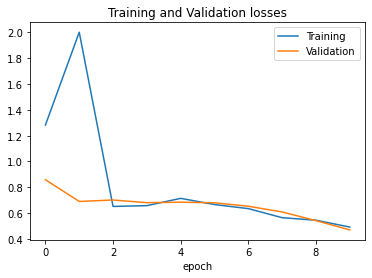

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

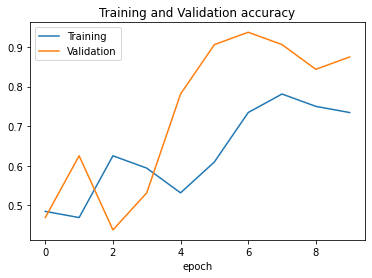

In [11]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')